In [1]:
import pandas as pd
loan = "/content/final_cleaned.csv"
df_2 = pd.read_csv(loan)
#print(df_2.head())
df_2.isnull().sum()


,0
funded_amnt,0
int_rate,0
installment,0
emp_length,0
annual_inc,0
dti,0
delinq_2yrs,0
fico_range_low,0
fico_range_high,0
inq_last_6mths,0


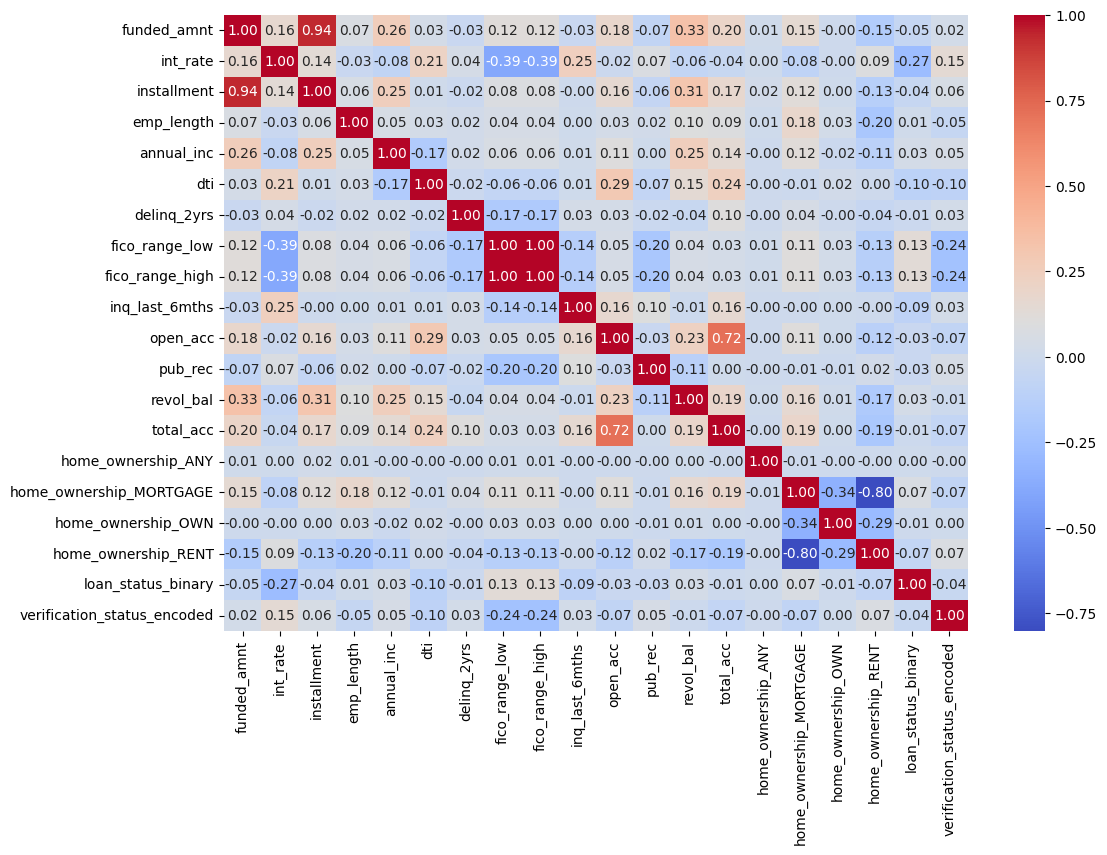

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [3]:
df_2['fico_avg'] = (df_2['fico_range_low'] + df_2['fico_range_high']) / 2
df_2.drop(['fico_range_low', 'fico_range_high'], axis=1, inplace=True)


In [4]:
print(df_2.head())

   funded_amnt  int_rate  installment  emp_length  annual_inc    dti  \
0         3600     13.99       123.03        10.5     55000.0   5.91   
1        24700     11.99       820.28        10.5     65000.0  16.06   
2        20000     10.78       432.66        10.5     63000.0  10.78   
3        35000     14.85       829.90        10.5    110000.0  17.06   
4        10400     22.45       289.91         3.0    104433.0  25.37   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0            0               1         7        0       2765         13   
1            1               4        22        0      21470         38   
2            0               0         6        0       7869         18   
3            0               0        13        0       7802         17   
4            1               3        12        0      21929         35   

   home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_OWN  \
0                   0                        1

loan_status_binary
 1    29197
 0     6424
-1      278
Name: count, dtype: int64
loan_status_binary
 1    81.330956
 0    17.894649
-1     0.774395
Name: proportion, dtype: float64


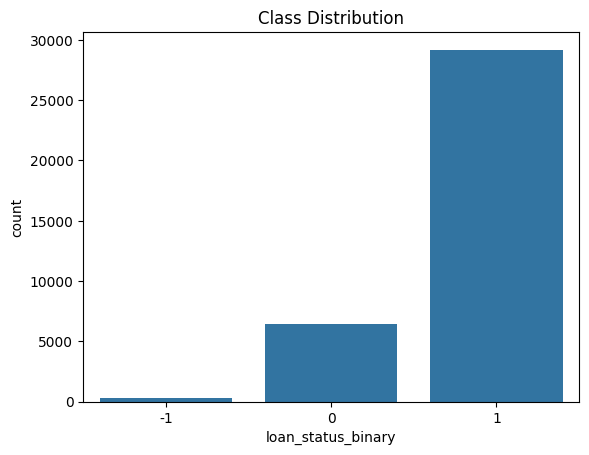

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(df_2['loan_status_binary'].value_counts())

# Check percentage distribution
print(df_2['loan_status_binary'].value_counts(normalize=True) * 100)

# Plot the class distribution
sns.countplot(x=df_2['loan_status_binary'])
plt.title('Class Distribution')
plt.show()


In [24]:
df_3 = df_2[df_2['loan_status_binary'] != -1]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assume 'df_2' is your dataset and 'target' is the column with the target variable
X = df_2.drop('loan_status_binary', axis=1)  # Drop the target variable from features
y = df_2['loan_status_binary']  # Target variable

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)


                        Feature  Importance
1                      int_rate    0.110048
5                           dti    0.105505
10                    revol_bal    0.103449
4                    annual_inc    0.087738
2                   installment    0.083590
18                  pca_feature    0.082482
11                    total_acc    0.079764
8                      open_acc    0.067456
0                   funded_amnt    0.064064
17                     fico_avg    0.062353
3                    emp_length    0.047522
7                inq_last_6mths    0.026056
16  verification_status_encoded    0.021361
6                   delinq_2yrs    0.020211
9                       pub_rec    0.016202
15          home_ownership_RENT    0.008197
13      home_ownership_MORTGAGE    0.007675
14           home_ownership_OWN    0.006328
12           home_ownership_ANY    0.000000


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression

# Define features and target variable
X = df_3[['int_rate', 'dti', 'revol_bal', 'annual_inc','funded_amnt', 'fico_avg','open_acc','emp_length','pub_rec','home_ownership_RENT', 'home_ownership_OWN', 'home_ownership_ANY', 'home_ownership_MORTGAGE']]
y = df_3['loan_status_binary']  # Replace 'target' with your actual target column

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)  # Use RandomForestRegressor for regression tasks
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8241


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression

# Define features and target variable
X = df_3[['int_rate', 'dti', 'revol_bal', 'annual_inc','funded_amnt', 'fico_avg','open_acc','emp_length','pub_rec','home_ownership_RENT', 'home_ownership_OWN', 'home_ownership_ANY', 'home_ownership_MORTGAGE']]
y = df_3['loan_status_binary']  # Replace 'target' with your actual target column

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=100,   # Keep 100 trees (or increase to 200)
    max_depth=15,       # Restrict tree depth (try 10-20)
    min_samples_split=10,  # Require more samples before a split
    random_state=42
)
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy [Balanced class weights]: {accuracy:.4f}")


train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))




Model Accuracy [Balanced class weights]: 0.7628
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35      1236
           1       0.86      0.85      0.86      5889

    accuracy                           0.76      7125
   macro avg       0.60      0.60      0.60      7125
weighted avg       0.77      0.76      0.77      7125



In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE on Training Data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train Random Forest Model on Resampled Data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate Model
#y_pred = rf_model.predict(X_test)
#print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy [SMOTE Analysis]: {accuracy:.4f}")


train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy [SMOTE Analysis]: 0.7628
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35      1236
           1       0.86      0.85      0.86      5889

    accuracy                           0.76      7125
   macro avg       0.60      0.60      0.60      7125
weighted avg       0.77      0.76      0.77      7125



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced')

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy [Balanced class weights]: {accuracy:.4f}")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy [Balanced class weights]: 0.6553
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.63      0.39      1236
           1       0.89      0.66      0.76      5889

    accuracy                           0.66      7125
   macro avg       0.59      0.64      0.57      7125
weighted avg       0.79      0.66      0.70      7125



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)  # You can also specify other parameters, such as sampling_strategy
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the resampled data
log_reg_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
print(f"Model Accuracy (with SMOTE): {accuracy:.4f}")

# Print the Classification Report
print("Logistic Regression Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred))


Model Accuracy (with SMOTE): 0.7259
Logistic Regression Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.30      0.45      0.36      1236
           1       0.87      0.78      0.83      5889

    accuracy                           0.73      7125
   macro avg       0.59      0.62      0.59      7125
weighted avg       0.77      0.73      0.75      7125



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the undersampled data
log_reg_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
print(f"Model Accuracy (with Random Undersampling): {accuracy:.4f}")

# Print the Classification Report
print("Logistic Regression Classification Report (with Random Undersampling):")
print(classification_report(y_test, y_pred))


Model Accuracy (with Random Undersampling): 0.6608
Logistic Regression Classification Report (with Random Undersampling):
              precision    recall  f1-score   support

           0       0.28      0.62      0.39      1236
           1       0.89      0.67      0.77      5889

    accuracy                           0.66      7125
   macro avg       0.59      0.64      0.58      7125
weighted avg       0.79      0.66      0.70      7125



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from xgboost import XGBClassifier

# Calculate class weight ratio (majority/minority)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(n_estimators=100, scale_pos_weight=0.19, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.26      0.58      0.36      1236
           1       0.88      0.65      0.75      5889

    accuracy                           0.64      7125
   macro avg       0.57      0.62      0.55      7125
weighted avg       0.77      0.64      0.68      7125



In [28]:
#latest accuracy
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.36      0.35      1236
           1       0.86      0.85      0.86      5889

    accuracy                           0.76      7125
   macro avg       0.60      0.60      0.60      7125
weighted avg       0.77      0.76      0.77      7125



In [23]:
#old Accuracy before removing -1 class
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        51
           0       0.32      0.37      0.34      1276
           1       0.85      0.83      0.84      5853

    accuracy                           0.74      7180
   macro avg       0.39      0.40      0.40      7180
weighted avg       0.75      0.74      0.75      7180



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.decomposition import PCA

# Assuming 'df' is the DataFrame with correlated features
features = ['installment', 'funded_amnt']
X = df_2[features]

# Standardizing the features before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)  # You can choose the number of components based on your need
df_2['pca_feature'] = pca.fit_transform(X_scaled)


In [ ]:
print(df_2.head())

   funded_amnt  int_rate  installment  emp_length  annual_inc    dti  \
0         3600     13.99       123.03        10.5     55000.0   5.91   
1        24700     11.99       820.28        10.5     65000.0  16.06   
2        20000     10.78       432.66        10.5     63000.0  10.78   
3        35000     14.85       829.90        10.5    110000.0  17.06   
4        10400     22.45       289.91         3.0    104433.0  25.37   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0            0               1         7        0       2765         13   
1            1               4        22        0      21470         38   
2            0               0         6        0       7869         18   
3            0               0        13        0       7802         17   
4            1               3        12        0      21929         35   

   home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_OWN  \
0                   0                        1

In [ ]:
# Check the explained variance ratio for the component
print("Explained variance ratio of the first component:")
print(pca.explained_variance_ratio_)


Explained variance ratio of the first component:
[0.97152037]


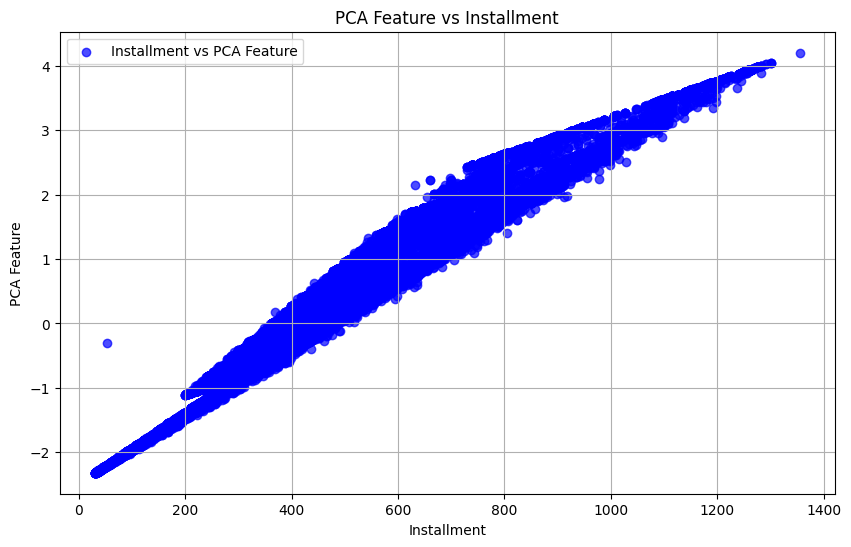

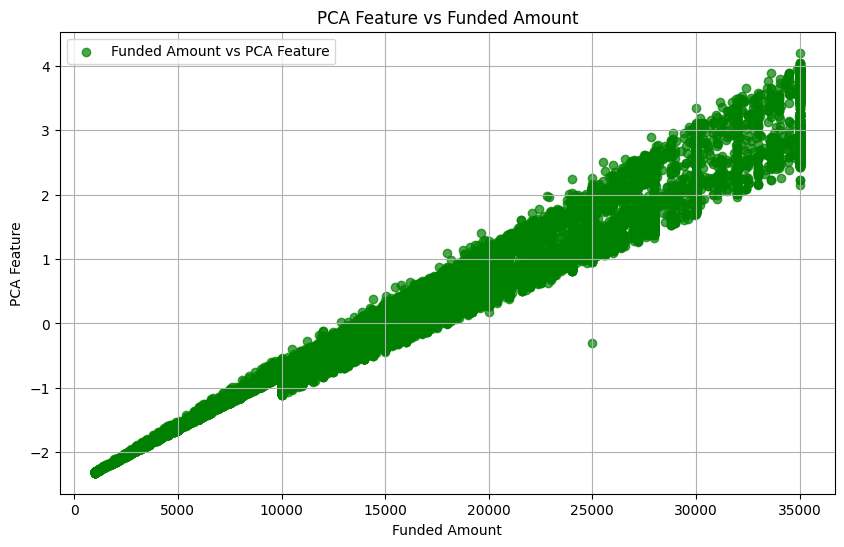

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the PCA feature vs. 'installment'
plt.figure(figsize=(10, 6))
plt.scatter(df_2['installment'], df_2['pca_feature'], c='blue', label='Installment vs PCA Feature', alpha=0.7)
plt.title('PCA Feature vs Installment')
plt.xlabel('Installment')
plt.ylabel('PCA Feature')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Scatter plot of the PCA feature vs. 'funded_amnt'
plt.figure(figsize=(10, 6))
plt.scatter(df_2['funded_amnt'], df_2['pca_feature'], c='green', label='Funded Amount vs PCA Feature', alpha=0.7)
plt.title('PCA Feature vs Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('PCA Feature')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


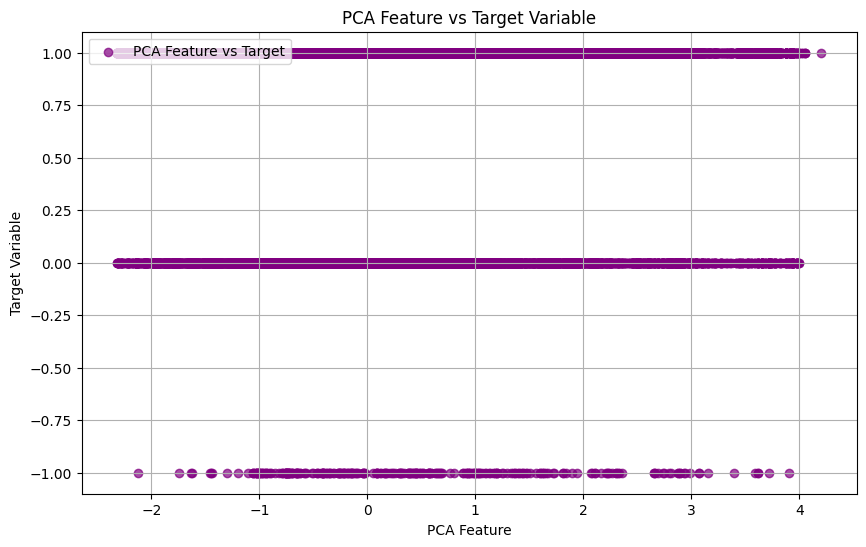

In [ ]:
# Scatter plot of the PCA feature vs. target variable
plt.figure(figsize=(10, 6))
plt.scatter(df_2['pca_feature'], df_2['loan_status_binary'], c='purple', label='PCA Feature vs Target', alpha=0.7)
plt.title('PCA Feature vs Target Variable')
plt.xlabel('PCA Feature')
plt.ylabel('Target Variable')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


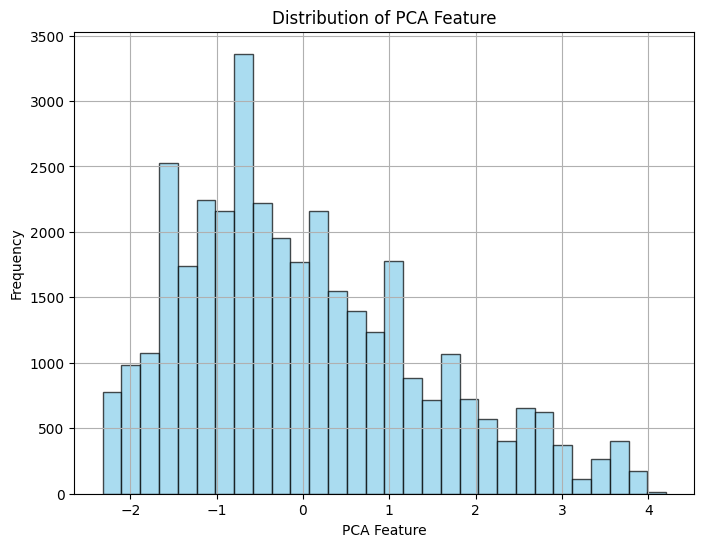

In [ ]:
# Plot histogram of the pca_feature to see the distribution
plt.figure(figsize=(8, 6))
plt.hist(df_2['pca_feature'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of PCA Feature')
plt.xlabel('PCA Feature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


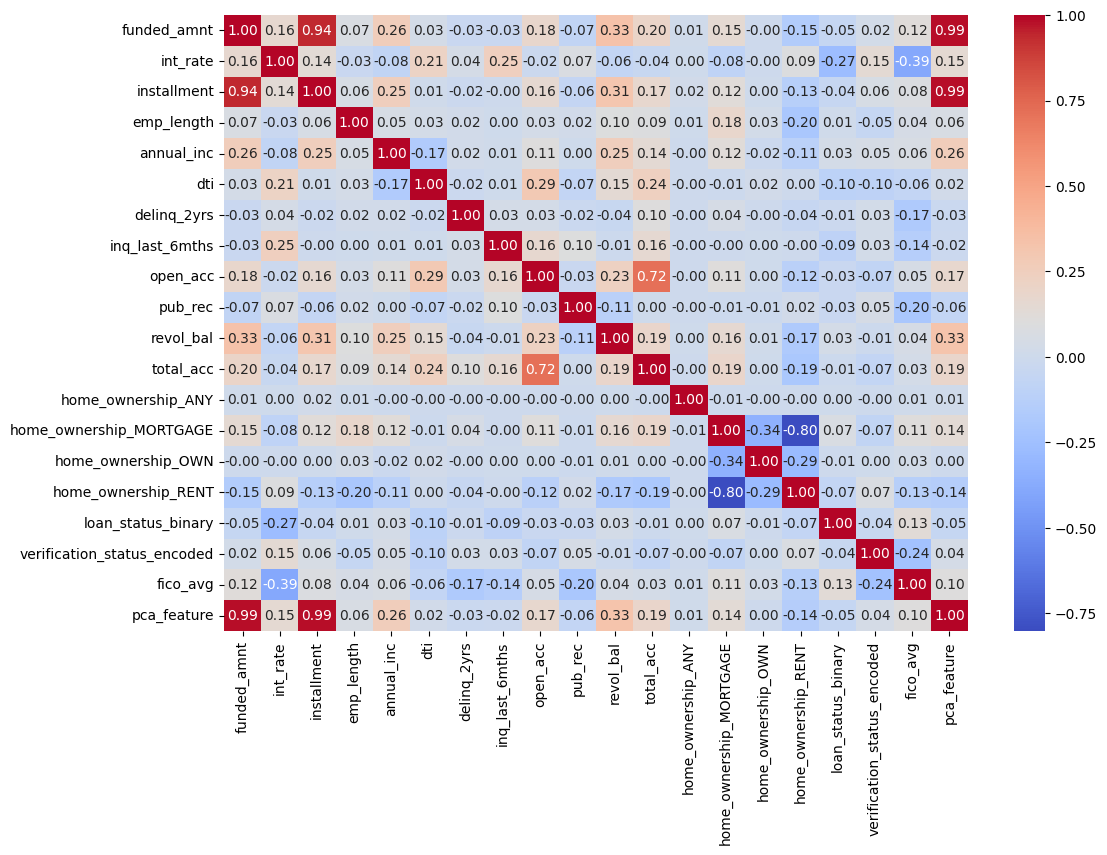

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.8142


In [13]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8536
Test Accuracy: 0.8156


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate sample weights based on the target values
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Create the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model with sample weights
gbc_model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict the target variable for the test set
y_pred = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with Balanced Sample Weights): {accuracy:.4f}")

# Print the Classification Report
print("Gradient Boosting Classification Report (with Balanced Sample Weights):")
print(classification_report(y_test, y_pred))


Model Accuracy (with Balanced Sample Weights): 0.6331
Gradient Boosting Classification Report (with Balanced Sample Weights):
              precision    recall  f1-score   support

           0       0.27      0.67      0.39      1236
           1       0.90      0.63      0.74      5889

    accuracy                           0.63      7125
   macro avg       0.59      0.65      0.56      7125
weighted avg       0.79      0.63      0.68      7125



In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled data
gbc_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with SMOTE Oversampling): {accuracy:.4f}")

# Print the Classification Report
print("Gradient Boosting Classification Report (with SMOTE Oversampling):")
print(classification_report(y_test, y_pred))


Model Accuracy (with SMOTE Oversampling): 0.7968
Gradient Boosting Classification Report (with SMOTE Oversampling):
              precision    recall  f1-score   support

           0       0.34      0.18      0.24      1236
           1       0.84      0.93      0.88      5889

    accuracy                           0.80      7125
   macro avg       0.59      0.55      0.56      7125
weighted avg       0.76      0.80      0.77      7125



In [22]:
from sklearn.ensemble import GradientBoostingClassifier

ensemble_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ensemble_model.fit(X_train, y_train)

# Evaluate
ensemble_train_acc = ensemble_model.score(X_train, y_train)
ensemble_test_acc = ensemble_model.score(X_test, y_test)

print(f"Ensemble Training Accuracy: {ensemble_train_acc:.4f}")
print(f"Ensemble Test Accuracy: {ensemble_test_acc:.4f}")


TypeError: GradientBoostingClassifier.__init__() got an unexpected keyword argument 'class_weight'

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

# Assuming you have y_test (true labels) and y_pred (predicted labels)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'micro', 'macro', 'weighted' for multiclass

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # 'micro', 'macro', 'weighted' for multiclass

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'micro', 'macro', 'weighted' for multiclass

# ROC AUC
#roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr', average='weighted')  # Use probabilities instead of labels for multi-class

# Confusion Matrix
#conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
#print(f"ROC AUC: {roc_auc:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8156
Precision: 0.7579
Recall: 0.8156
F1 Score: 0.7436


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Check for data leakage between training and test sets
duplicate_rows = X_test.merge(X_train, how='inner')
print(f"Number of duplicate rows between train and test: {duplicate_rows.shape[0]}")


Number of duplicate rows between train and test: 502


In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_2.drop(columns=['int_rate', 'dti', 'annual_inc','funded_amnt', 'fico_avg','open_acc','emp_length','pub_rec','home_ownership_RENT', 'home_ownership_OWN', 'home_ownership_ANY', 'home_ownership_MORTGAGE'])  # Drop the target column, keeping all features
y = df_2['loan_status_binary']  # Replace 'target' with your actual target column

# Map target classes manually
y_mapped = y.replace({-1: 0, 0: 1, 1: 2})

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train_xg, y_test_xg = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

# Initialize XGBoost model
xg_model = xgb.XGBClassifier(
    n_estimators=100,    # Number of trees (can increase for better performance)
    max_depth=6,         # Depth of each tree
    learning_rate=0.1,   # Controls the learning rate
    random_state=42
)

# Train the model
xg_model.fit(X_train, y_train_xg)

# Make predictions
y_train_pred = xg_model.predict(X_train)
y_test_pred = xg_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_xg, y_train_pred)
test_accuracy = accuracy_score(y_test_xg, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 1.0000


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers to use
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
#best_log_reg_model = grid_search.best_estimator_
log_reg_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_reg_model.fit(X_train, y_train)

# Evaluate the model
best_train_acc = best_log_reg_model.score(X_train, y_train)
best_test_acc = best_log_reg_model.score(X_test, y_test)

print(f"Best Model Training Accuracy: {best_train_acc:.4f}")
print(f"Best Model Test Accuracy: {best_test_acc:.4f}")


NameError: name 'LogisticRegression' is not defined